## Desafío - Estimando curvas normales

* Para poder realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip

#### 1. Importe de csv 

* Utilice la base de datos de un compañero creada en la sesión pasada.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:

ss_mneira = pd.read_csv('subsample__demo.csv').drop("Unnamed: 0", axis = 1)


### 2. Importe su conjunto de funciones
* Genere un archivo ancilliary_funcs.py para guardar las funciones creadas en la sesión pasada e impórtelo.
* Utilice las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra de su compañero.

In [3]:
import ancilliary_funcs as af

In [4]:
for colname, serie in ss_mneira.iteritems():
    af.ver_data_perdida(ss_mneira, colname)


 Columna:			cname 
 Cantidad de datos perdidos: 	0 
 Frecuencia:			0.00%
___________________________________________________________________________________________________________________

 Columna:			undp_hdi 
 Cantidad de datos perdidos: 	3 
 Frecuencia:			3.09%
___________________________________________________________________________________________________________________

 Columna:			ccodealp 
 Cantidad de datos perdidos: 	0 
 Frecuencia:			0.00%
___________________________________________________________________________________________________________________

 Columna:			ht_region 
 Cantidad de datos perdidos: 	0 
 Frecuencia:			0.00%
___________________________________________________________________________________________________________________

 Columna:			gle_cgdpc 
 Cantidad de datos perdidos: 	2 
 Frecuencia:			2.06%
___________________________________________________________________________________________________________________

 Columna:			imf_pop 
 Cantidad de d

### 3. Estime el puntaje Z

* Genere un histograma (utilice density=True) con la columna undp_hdi y analice su curva de densidad empírica.

* Genere una nueva columna llamada z_undp_hdi que almacene el Z-score para la variable undp_hdi. Para el calculo utilice alguna operacion vectorizada.

* Reporte la media, varianza y desviacion estandar de la nueva variable z_undp_hdi.

* Genere un histograma de la nueva variable z_undp_hdi y comparelo con el histograma de undp_hdi. Comente brevemente los resultados de la comparación.





Text(0.5, 1.0, 'Histograma del IDH')

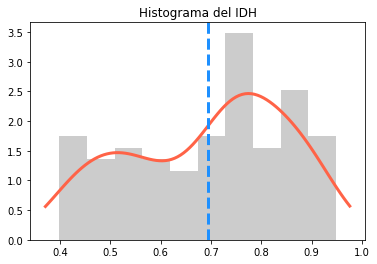

In [5]:

hdi_dropna = ss_mneira['undp_hdi'].dropna();

plt.hist(hdi_dropna, color='grey', alpha=.4, density=True)
x_min, x_max = plt.xlim()
x_axis = np.linspace(x_min, x_max, 100)
gauss_kde = stats.gaussian_kde(hdi_dropna) 
Z = np.reshape(gauss_kde(x_axis).T, x_axis.shape)
plt.plot(x_axis, Z, color='tomato', lw=3)
plt.axvline(hdi_dropna.mean(), color='dodgerblue', linestyle='--', lw=3) 
plt.title("Histograma del IDH")

al parecer los paises en la diagonal que intersecta la media son aquellos que estan en vias de desarrollo,
aquellos que tienden a la izquierda son aquellos paises no desarrollados, y los de la derecha aquellos que se pueden denominar desarrollados.

Text(0.5, 1.0, 'Histograma del IDH')

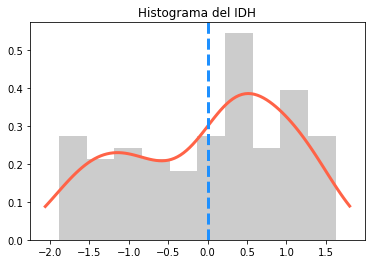

In [6]:
z_undp_hdi=((hdi_dropna - hdi_dropna.mean()) / np.sqrt(hdi_dropna.var()))

plt.hist(z_undp_hdi, color='grey', alpha=.4, density=True)
x_min, x_max = plt.xlim()
x_axis = np.linspace(x_min, x_max, 100)
gauss_kde = stats.gaussian_kde(z_undp_hdi) 
Z = np.reshape(gauss_kde(x_axis).T, x_axis.shape)
plt.plot(x_axis, Z, color='tomato', lw=3)
plt.axvline(z_undp_hdi.mean(), color='dodgerblue', linestyle='--', lw=3) 
plt.title("Histograma del IDH")

In [7]:
print('media puntaje z: ',round(z_undp_hdi.mean()))
print('varianza puntaje z: ',round(z_undp_hdi.var()))
print('desviación standar puntaje z: ',np.sqrt(z_undp_hdi.var()))

media puntaje z:  0
varianza puntaje z:  1
desviación standar puntaje z:  1.0


El puntaje Z movió la media en el eje x hacia la izquierda hasta dejarlo en 0 y la varianza y desviación estandar ahora son de 1

### 4. Estime el puntaje z de las regiones

Basado en la función dotplot generada la clase anterior deberá generar una función similar con los siguientes argumentos:
* dataframe: pandas dataframe
* plot_var: variable que se quiere analizar
* plot_by: variable agrupadora que por default será el nombre de la región
* statistic: variable que podrá ser mean or median. Por default será mean

La función debe generar el Z-score para la variable plot_var, agrupar (por la variable plot_by) y aplicar estadistico (statistic) sobre cada grupo. El resultado debe reflejarse en un dotplot.


In [8]:
def dotplot_graf(dataframe,plot_var,plot_by,statistic='mean'):
    dataframe['Z']=((dataframe[plot_var] - dataframe[plot_var].mean()) / np.sqrt(dataframe[plot_var].var()))
    if(statistic=='mean'):
        group = round(dataframe.groupby(plot_by)['Z'].mean(),2) 
    if(statistic=='var'):
        group = round(dataframe.groupby(plot_by)['Z'].var(),2) 
    if(statistic=='std'):
        group = round(dataframe.groupby(plot_by)['Z'].std(),2) 
    plt.plot(group.values, group.index, 'o', color = 'grey') 
    plt.axvline(dataframe['Z'].mean(), color='dodgerblue', linestyle='--', lw=2) 



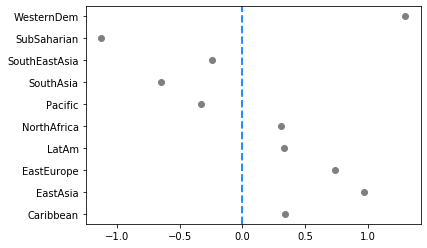

In [9]:
dotplot_graf(ss_mneira,'undp_hdi','region_recod','mean')

### 5. Genere un método que devuelva curva de densidad empírica

* El método debe contener los siguientes parámetros:
    * dataframe: pandas dataframe
    * variable: variable a gráficar
    * log: Booleano. Si es True se transformará la variable al logaritmo, por default False.

* Gráfique las curvas para imf_pop, gle_cgdpc y undp_hdi.

* En que casos es necesaior utilizar transformación logaritmica

In [10]:
def densidad_empirica(dataframe,plot_var,log=False):

    grafic_var = dataframe[plot_var].dropna()
    if log:
        grafic_var = np.log(grafic_var)
    
    plt.hist(grafic_var, color='grey', alpha=.4, density=True)
    x_min, x_max = plt.xlim()
    x_axis = np.linspace(x_min, x_max, 100)
    gauss_kde = stats.gaussian_kde(grafic_var) 
    Z = np.reshape(gauss_kde(x_axis).T, x_axis.shape)
    plt.plot(x_axis, Z, color='tomato', lw=3)
    plt.axvline(grafic_var.mean(), color='dodgerblue', linestyle='--', lw=3) 
    plt.title(f"Histograma del IDH var:{plot_var}")

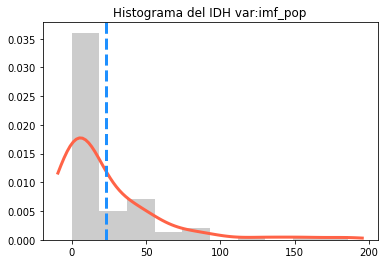

In [11]:
densidad_empirica(ss_mneira,'imf_pop',log=False)

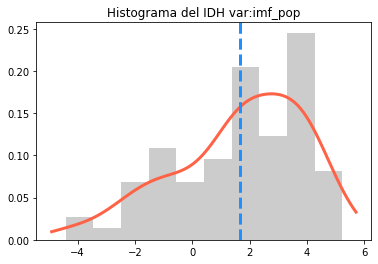

In [12]:
densidad_empirica(ss_mneira,'imf_pop',log=True)

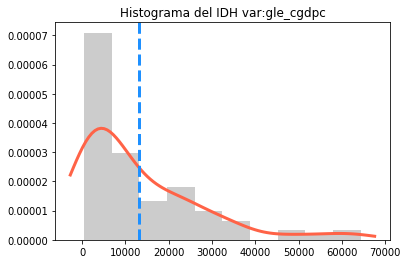

In [13]:
densidad_empirica(ss_mneira,'gle_cgdpc',log=False)

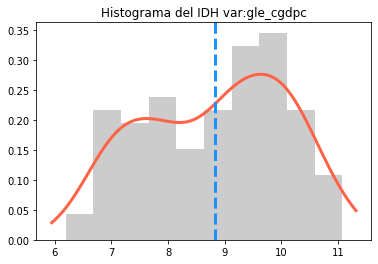

In [14]:
densidad_empirica(ss_mneira,'gle_cgdpc',log=True)

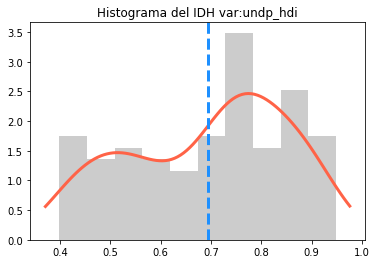

In [15]:
densidad_empirica(ss_mneira,'undp_hdi',log=False)